Train Set Shape: (1618172, 15), Labels: (1618172,)
Test Set Shape: (404543, 15), Labels: (404543,)

Encoded Classes: ['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'DDoS attacks-LOIC-HTTP'
 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris' 'Infilteration']
Training XGBoost model...

Train Accuracy: 0.9692
Test Accuracy: 0.9691

Classification Report (Test Set):
                        precision    recall  f1-score   support

                Benign       0.96      1.00      0.98    266244
      Brute Force -Web       0.95      0.56      0.70        72
      Brute Force -XSS       0.93      0.90      0.92        30
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115235
 DoS attacks-GoldenEye       1.00      1.00      1.00      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.65      0.03      0.05     12614

              accuracy                           0.97    404543
             macro avg       0.93      0.78      0.81    40

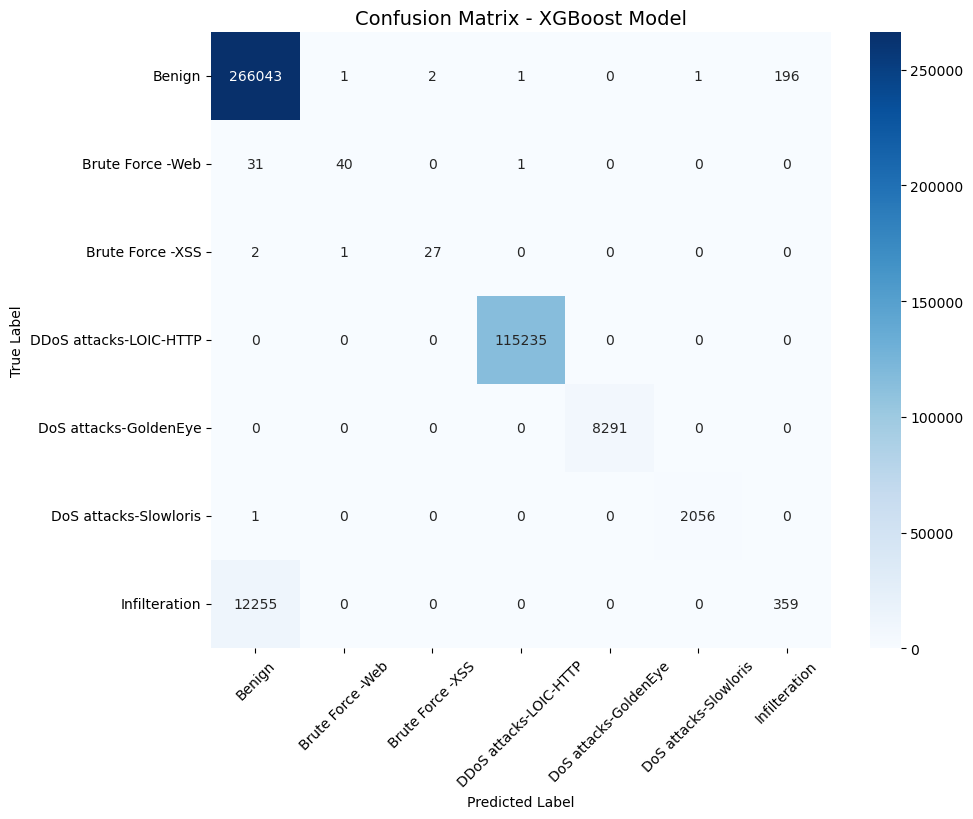

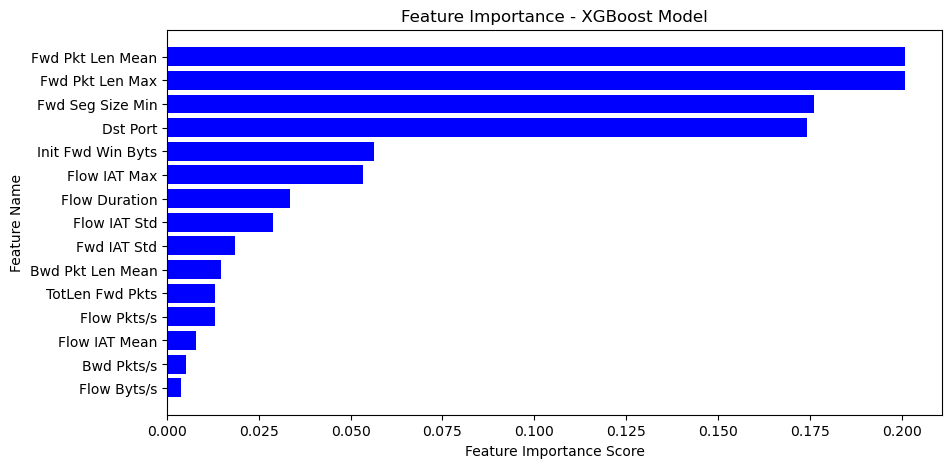

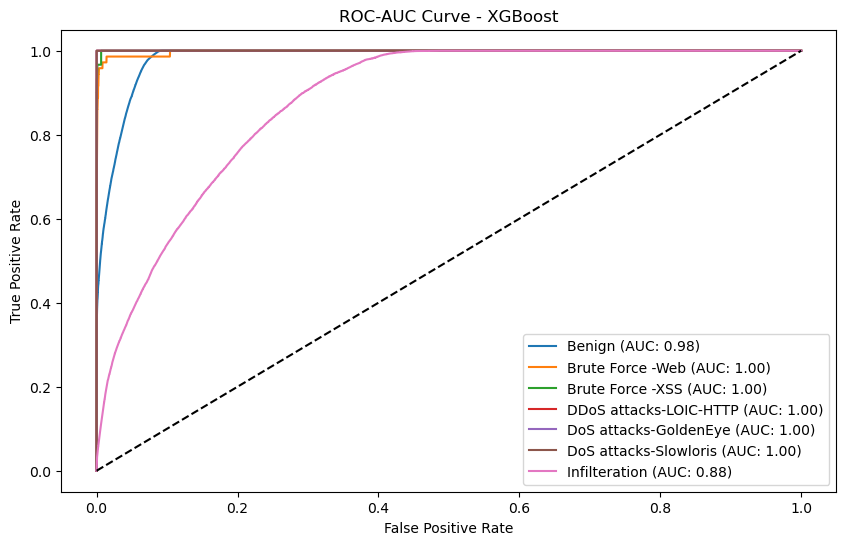


Final Evaluation Summary:
Train Accuracy: 0.9692
Test Accuracy: 0.9691
Feature importance and confusion matrix plotted.


In [1]:
"""
Notebook: XGBoost Model Training for INADS
------------------------------------------
Objective:
- Train an XGBoost model for anomaly detection in network traffic.
- Evaluate model performance using accuracy, confusion matrix, and ROC-AUC.
- Compare with Random Forest baseline results.

Dataset:
- Preprocessed train and test sets (train_set_fixed.csv, test_set_fixed.csv).
- Label encoding applied for multi-class classification.

"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# ===============================
# Step 1: Load the Train and Test Sets
# ===============================

# Define dataset paths
train_path = r"C:\Users\S569652\Documents\INADS\data\train_set_fixed.csv"
test_path = r"C:\Users\S569652\Documents\INADS\data\test_set_fixed.csv"

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Separate features and labels
X_train = train_df.drop(columns=["Label"])  # Features
y_train = train_df["Label"]  # Labels

X_test = test_df.drop(columns=["Label"])  # Features
y_test = test_df["Label"]  # Labels

# Check dataset shapes
print(f"Train Set Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test Set Shape: {X_test.shape}, Labels: {y_test.shape}")

# ===============================
# Step 2: Encode Labels
# ===============================

# Convert categorical labels to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display encoded class mapping
print("\nEncoded Classes:", label_encoder.classes_)

# ===============================
# Step 3: Train the XGBoost Model
# ===============================

# Define the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=200,       # Number of trees
    max_depth=6,            # Depth of each tree
    learning_rate=0.1,      # Step size shrinkage for better optimization
    subsample=0.8,          # Fraction of training samples used per tree
    colsample_bytree=0.8,   # Fraction of features used per tree
    random_state=42,
    eval_metric="mlogloss"
)

# Train the model
print("Training XGBoost model...")
xgb_model.fit(X_train, y_train_encoded)

# ===============================
# Step 4: Model Evaluation
# ===============================

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train_encoded, xgb_model.predict(X_train))
test_acc = accuracy_score(y_test_encoded, y_pred)

print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ===============================
# Step 5: Confusion Matrix
# ===============================

# Generate Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test_encoded, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix - XGBoost Model", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.show()

# ===============================
# Step 6: Feature Importance
# ===============================

# Extract feature importance scores
feature_importance = xgb_model.feature_importances_

# Create DataFrame for visualization
feature_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(feature_df["Feature"], feature_df["Importance"], color="blue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance - XGBoost Model")
plt.gca().invert_yaxis()
plt.show()

# ===============================
# Step 7: ROC-AUC Curve
# ===============================

# Compute ROC-AUC score for each class
y_proba = xgb_model.predict_proba(X_test)
plt.figure(figsize=(10, 6))

for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_encoded == i, y_proba[:, i])
    auc = roc_auc_score(y_test_encoded == i, y_proba[:, i])
    plt.plot(fpr, tpr, label=f"{class_label} (AUC: {auc:.2f})")

# Plot diagonal baseline
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve - XGBoost")
plt.legend()
plt.show()

# ===============================
# Final Results
# ===============================

print("\nFinal Evaluation Summary:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("Feature importance and confusion matrix plotted.")

In [5]:
import xgboost as xgb

# Save the trained model
xgb_model.save_model("xgboost_inads.model")
print("XGBoost model saved successfully.")

XGBoost model saved successfully.


C:\Users\S569652\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:37:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [6]:
xgb_model.save_model("xgboost_inads.json")
print("XGBoost model saved in JSON format.")

XGBoost model saved in JSON format.


In [7]:
xgb_model.save_model("xgboost_inads.ubj")
print("XGBoost model saved in UBJSON format.")

XGBoost model saved in UBJSON format.
